## Kaggle 데이터 불러오기

In [2]:
# from google.colab import files
# files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json

# 파일 다운로드
!kaggle datasets download -d fedesoriano/company-bankruptcy-prediction

  0% 0.00/4.63M [00:00<?, ?B/s]
100% 4.63M/4.63M [00:00<00:00, 42.7MB/s]


In [4]:
!unzip company-bankruptcy-prediction.zip

Archive:  company-bankruptcy-prediction.zip
  inflating: data.csv                


## 기준모델

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df_origin = pd.read_csv("data.csv")
df, df_test = train_test_split(df_origin, test_size=0.2)

target = ['Bankrupt?']


## 기준 모델
base_accuracy = df_test[target].value_counts(normalize=True)[0]
print("기준모델 정확도: ", base_accuracy)

기준모델 정확도:  Bankrupt?
0            0.967742
dtype: float64


## Oversampling 통해 데이터 편향 해결

In [6]:
from imblearn.over_sampling import SMOTE


## Oversampling 통해 데이터 편향 해결
oversample = SMOTE(random_state=2)

X_a = df.drop(labels=target, axis=1)
y_a = df[target]

X, y = oversample.fit_resample(X_a, y_a)
X = pd.DataFrame(X, columns=X_a.columns)
y = pd.DataFrame(y, columns=['Bankruptcy?'])

print("Oversampling 이후 기준모델 정확도: ", y.value_counts(normalize=True)[0])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Oversampling 이후 기준모델 정확도:  Bankruptcy?
0              0.5
dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Train & Validation Data Split

In [7]:
## Train & Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

## <Model 2>
## Logistic Regression 학습시키기

In [8]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.9MB/s 


In [9]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


## Logistic Regression
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(random_state=2)
)

pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGE

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=2,


## Logistic Regression 예측하기

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      4190
           1       0.89      0.92      0.91      4256

    accuracy                           0.90      8446
   macro avg       0.91      0.90      0.90      8446
weighted avg       0.91      0.90      0.90      8446

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1089
           1       0.90      0.93      0.92      1023

    accuracy                           0.92      2112
   macro avg       0.92      0.92      0.92      2112
weighted avg       0.92      0.92      0.92      2112

AUC: 0.9184661867946325


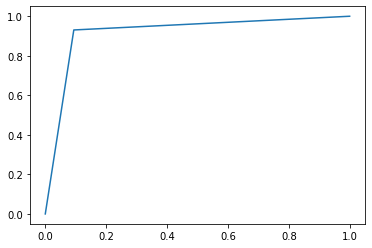

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import numpy as np


## 데이터 예측하기
y_train_pred = pipe.predict(X_train)
y_val_pred = pipe.predict(X_val)

## Confusion Matrix 출력
print(classification_report(y_train,y_train_pred))
print(classification_report(y_val,y_val_pred))

## ROC Curve 활용
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## Permutation Importance 알아보기

In [11]:
pip install eli5

     |████████████████████████████████| 112kB 6.5MB/s 


In [12]:
from sklearn.pipeline import Pipeline
import warnings
import eli5
from eli5.sklearn import PermutationImportance

## Permutation Importance 활용
# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
pipe_per = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer(), StandardScaler())),
    ('lr', LogisticRegression(random_state=2)) 
])

pipe_per.fit(X_train, y_train)


## Permutation Part
warnings.simplefilter(action='ignore', category=FutureWarning)

# permuter 정의
permuter = PermutationImportance(
    pipe_per.named_steps['lr'], # model
    scoring='roc_auc', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe_per.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproc

PermutationImportance(cv='prefit',
                      estimator=LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=2,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                      n_iter=5, random_state=2, refit=True, scoring='roc_auc')

In [13]:
feature_names = X_val.columns.tolist()
print("총 변수의 개수 : ", len(feature_names))
pd.Series(permuter.feature_importances_, feature_names).sort_values()

총 변수의 개수 :  95


 Total Asset Turnover                                -0.000351
 Tax rate (A)                                        -0.000160
 Interest Expense Ratio                              -0.000139
 Total expense/Assets                                -0.000115
 Interest-bearing debt interest rate                 -0.000098
                                                        ...   
 ROA(B) before interest and depreciation after tax    0.031539
 Net Income to Total Assets                           0.045417
 Net Value Per Share (B)                              0.053100
 Borrowing dependency                                 0.059446
 Persistent EPS in the Last Four Seasons              0.109133
Length: 95, dtype: float64

In [19]:
 ## 중요하지 않은 변수 삭제
minimum_importance = 0.01
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]

X_train_selected = X_train[features]
X_val_selected = X_val[features]


## 삭제 후 새로운 Pipeline
pipe_sel = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer(), StandardScaler())),
    ('lr', LogisticRegression(random_state=2)) 
], verbose=1)

pipe_sel.fit(X_train_selected, y_train)

print("총 변수의 개수 : ", len(X_val_selected.columns.tolist()))
print('시험 정확도 : ', pipe_sel.score(X_val_selected, y_val))

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.1s
총 변수의 개수 :  13
시험 정확도 :  0.9090909090909091


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Permutation Importance 분석으로 불필요한 변수 삭제 후 성능

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1089
           1       0.89      0.92      0.91      1023

    accuracy                           0.91      2112
   macro avg       0.91      0.91      0.91      2112
weighted avg       0.91      0.91      0.91      2112

AUC: 0.9095056133179301


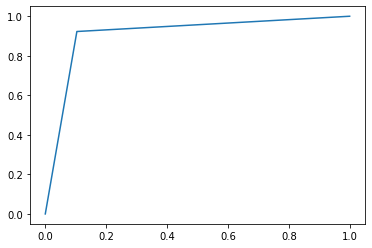

In [22]:
## Confusion Matrix 출력
y_val_selected_pred = pipe_sel.predict(X_val_selected)
print(classification_report(y_val, y_val_selected_pred))

## ROC Curve 활용
fpr, tpr, thresholds = roc_curve(y_val, y_val_selected_pred, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## 상관관계 및 다중공선성 진단

In [23]:
print(X_val_selected.corr())

                                                     ROA(A) before interest and % after tax  ...   Equity to Liability
 ROA(A) before interest and % after tax                                            1.000000  ...              0.103143
 ROA(B) before interest and depreciation after tax                                 0.957380  ...              0.102565
 Net Value Per Share (B)                                                           0.655016  ...              0.178647
 Persistent EPS in the Last Four Seasons                                           0.727079  ...              0.148995
 Debt ratio %                                                                     -0.448626  ...             -0.580528
 Net worth/Assets                                                                  0.448626  ...              0.580528
 Borrowing dependency                                                             -0.252834  ...             -0.142366
 Inventory and accounts receivable/Net value    

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_val_selected.values, i) for i in range(X_val_selected.shape[1])]
vif["features"] = X_val_selected.columns
vif.round(1)

,VIF Factor,features
0,36.7,ROA(A) before interest and % after tax
1,16.5,ROA(B) before interest and depreciation after...
2,3.3,Net Value Per Share (B)
3,4.3,Persistent EPS in the Last Four Seasons
4,75.6,Debt ratio %
5,1742.1,Net worth/Assets
6,2.2,Borrowing dependency
7,2.2,Inventory and accounts receivable/Net value
8,1.5,Cash/Total Assets
9,1.2,Cash Flow to Liability


In [45]:
clean_features = features.tolist()

clean_features.remove(" Net worth/Assets")
clean_features.remove(" Net Income to Total Assets")
clean_features.remove(" ROA(B) before interest and depreciation after tax")
clean_features.remove(" Inventory and accounts receivable/Net value")
clean_features.remove(" Cash Flow to Liability")
clean_features.remove(" Persistent EPS in the Last Four Seasons")
clean_features.remove(" Net Value Per Share (B)")
clean_features.remove(" Borrowing dependency")
clean_features.remove(" ROA(A) before interest and % after tax")

In [46]:
X_val_vif = X_val[clean_features]

vif_after = pd.DataFrame()
vif_after["VIF Factor"] = [variance_inflation_factor(X_val_vif.values, i) for i in range(X_val_vif.shape[1])]
vif_after["features"] = X_val_vif.columns
vif_after.round(1)

,VIF Factor,features
0,1.3,Debt ratio %
1,1.6,Cash/Total Assets
2,1.1,Liability-Assets Flag
3,1.6,Equity to Liability


## 다중공선성 높은 변수 제거 후 성능

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1089
           1       0.79      0.85      0.82      1023

    accuracy                           0.82      2112
   macro avg       0.82      0.82      0.82      2112
weighted avg       0.82      0.82      0.82      2112

AUC: 0.8177523030895465


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


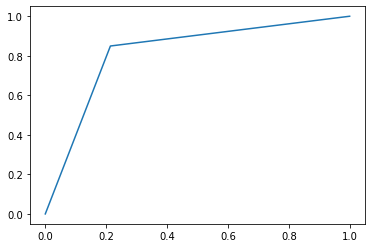

In [47]:
X_train_vif = X_train[clean_features]

pipe_vif = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer(), StandardScaler())),
    ('lr', LogisticRegression(random_state=2)) 
], verbose=1)

pipe_vif.fit(X_train_vif, y_train)

## Confusion Matrix 출력
y_val_vif_pred = pipe_vif.predict(X_val_vif)
print(classification_report(y_val, y_val_vif_pred))

## ROC Curve 활용
fpr, tpr, thresholds = roc_curve(y_val, y_val_vif_pred, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## Oversampling하여 학습한 모델을 비대칭적인 데이터셋에 적용

## pipe_sel (VIF 이전)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1320
           1       0.21      0.86      0.34        44

    accuracy                           0.89      1364
   macro avg       0.60      0.88      0.64      1364
weighted avg       0.97      0.89      0.92      1364

AUC: 0.8776515151515151


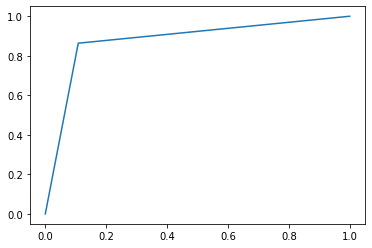

In [48]:
X_test = df_test.drop(labels=target, axis=1)
X_test_selected = X_test[features]
X_test_vif = X_test[clean_features]
y_test = df_test[target]


## Confusion Matrix 출력
y_test_selected_pred = pipe_sel.predict(X_test_selected)
print(classification_report(y_test, y_test_selected_pred))


## ROC Curve 활용
fpr, tpr, thresholds = roc_curve(y_test, y_test_selected_pred, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## pipe_vif (VIF 이후)

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      1320
           1       0.12      0.82      0.20        44

    accuracy                           0.79      1364
   macro avg       0.55      0.81      0.54      1364
weighted avg       0.96      0.79      0.86      1364

AUC: 0.8060606060606061


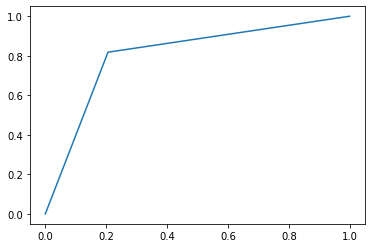

In [49]:
## Confusion Matrix 출력
y_test_vif_pred = pipe_vif.predict(X_test_vif)
print(classification_report(y_test, y_test_vif_pred))

## ROC Curve 활용
fpr, tpr, thresholds = roc_curve(y_test, y_test_vif_pred, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## 모두 파산 안한다고(0) 예측할 경우

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.00      0.00      0.00        44

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364

AUC: 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


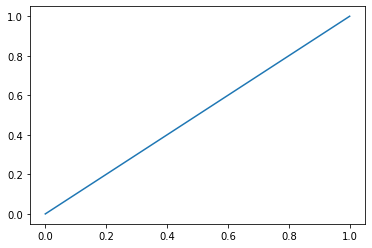

In [50]:
y_deny = pd.DataFrame({'Bankruptcy?':[0]*1364})

## Confusion Matrix 출력
print(classification_report(y_test, y_deny))

## ROC Curve 활용
fpr, tpr, thresholds = roc_curve(y_test, y_deny, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

변수들을 많이 삭제했음에도 성능을 아주 약간밖에 떨어지지 않음

## Oversampling하지 않고 학습한 모델의 성능

Bankrupt?
0            0.967736
1            0.032264
dtype: float64
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.60      0.07      0.12        44

    accuracy                           0.97      1364
   macro avg       0.78      0.53      0.55      1364
weighted avg       0.96      0.97      0.96      1364

AUC: 0.5333333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


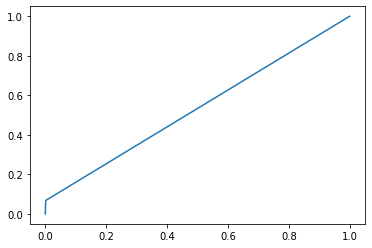

In [51]:
## 원래 데이터에 모델 대입해보기
## 기준모델
base_accuracy_origin = df[target].value_counts(normalize=True)
print(base_accuracy_origin)

### 기본적인 모델
pipe_org = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(random_state=2)
)

# 중요한 Featrues 추출 후 모델 Fit
X_origin = df.drop(labels=target, axis=1)[clean_features]
y_origin = df[target]
pipe_org.fit(X_origin, y_origin)

## Confusion Matrix 출력
y_test_origin_pred = pipe_org.predict(X_test_vif)
print(classification_report(y_test, y_test_origin_pred))

## ROC Curve 활용
fpr, tpr, thresholds = roc_curve(y_test, y_test_origin_pred, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## PDP & SHAP 활용하여 설명하기

In [52]:
pip install pdpbox

     |████████████████████████████████| 34.0MB 86kB/s 
     |████████████████████████████████| 13.1MB 206kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758227 sha256=69e1f29f597e51a269d6943b090cbd8080092002b7beadb97ada88136221b54d
  Stored in directory: /root/.cache/pip/wheels/c8/13/11/ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
Successfully built pdpbox
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


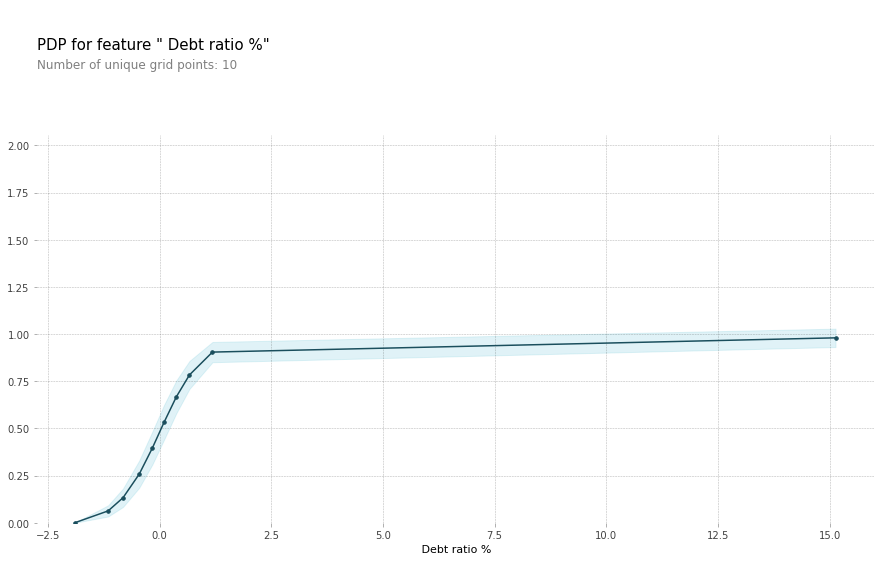

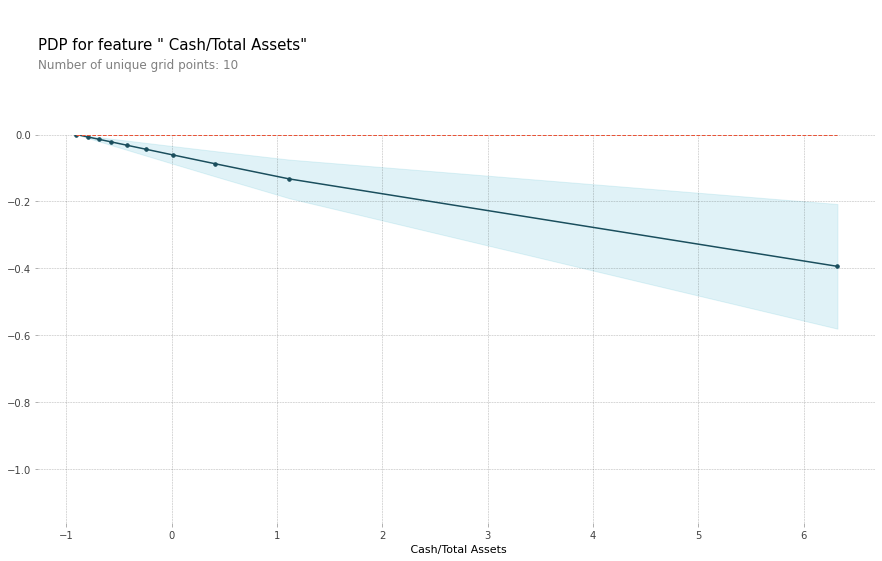

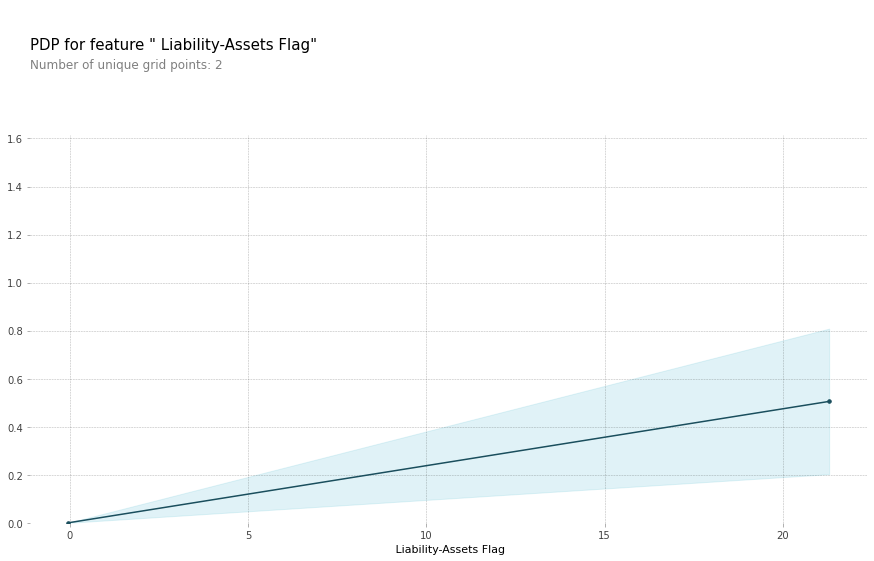

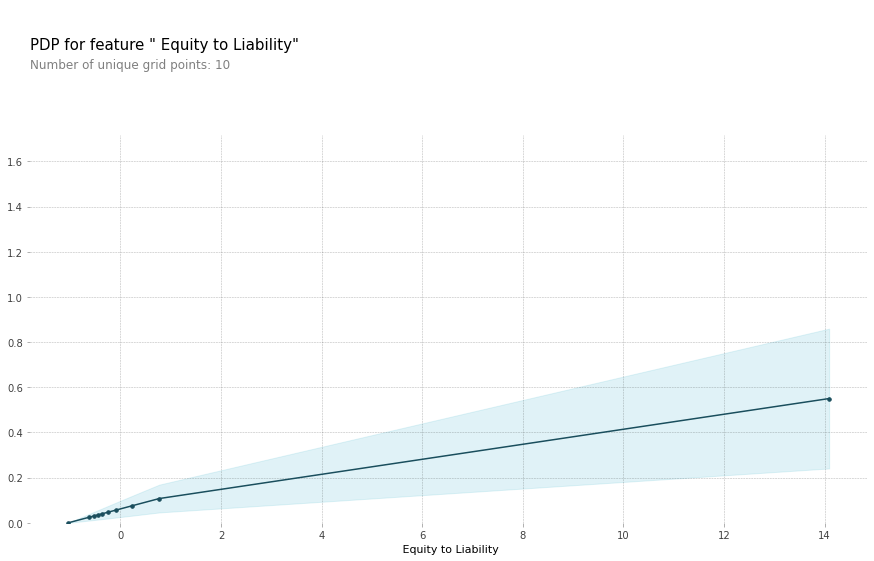

In [53]:
import matplotlib.pyplot as plt
from pdpbox import pdp


preprocessing = pipe_vif.named_steps['preprocessing']
X_preprocessed = preprocessing.fit_transform(X_test_vif)
X_preprocessed = pd.DataFrame(columns=clean_features, data=X_preprocessed)
lr = pipe_vif.named_steps['lr']

for feature in clean_features:
  pdp_dist = pdp.pdp_isolate(model=lr, dataset=X_preprocessed, model_features=clean_features, feature=feature)
  pdp.pdp_plot(pdp_dist, feature)

In [54]:
pip install shap

     |████████████████████████████████| 358kB 6.8MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491629 sha256=031a718caaee6f38726885489646e37da7d52a3666a6c6beefad560ca3ef26de
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


Exact explainer: 1001it [00:12, 77.74it/s]                           


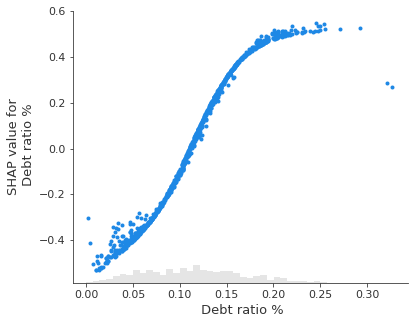

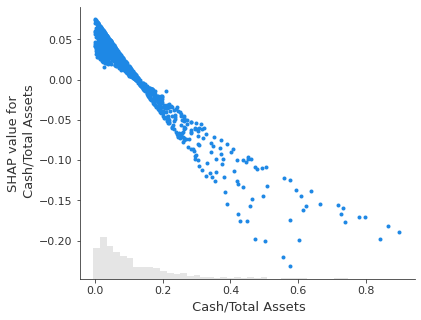

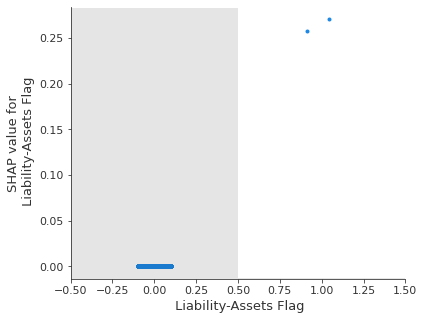

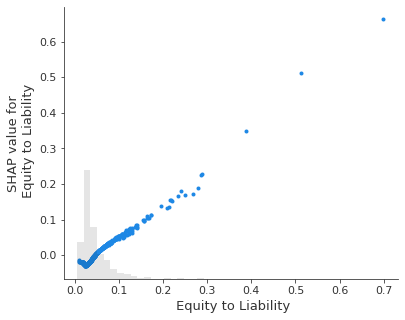

In [55]:
import shap


### SHAP
def pipe_vif_proba(x):
    return pipe_vif.predict_proba(x)[:,1]

background = shap.maskers.Independent(X_test_vif, max_samples=1000)
explainer = shap.Explainer(pipe_vif_proba, background)
shap_values = explainer(X_test_vif[:1000])

for feature in clean_features:
  shap.plots.scatter(shap_values[:, feature])

## 독립변수의 상관계수 확인 및 Permutaion Importance 재확인

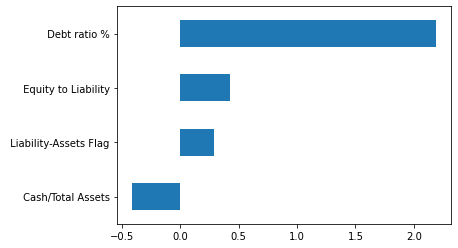

In [56]:
coefficients = pd.Series(lr.coef_[0], X_test_vif.columns)
coefficients.sort_values().plot.barh()

In [57]:
## Permutation Part
warnings.simplefilter(action='ignore', category=FutureWarning)

# permuter 정의
permuter_vif = PermutationImportance(
    pipe_vif.named_steps['lr'], # model
    scoring='roc_auc', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_test_transformed = pipe_vif.named_steps['preprocessing'].transform(X_test_vif)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter_vif.fit(X_test_transformed, y_test)

PermutationImportance(cv='prefit',
                      estimator=LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=2,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                      n_iter=5, random_state=2, refit=True, scoring='roc_auc')

In [ ]:
feature_names = X_test_vif.columns.tolist()
print("총 변수의 개수 : ", len(feature_names))
pd.Series(permuter_vif.feature_importances_, feature_names).sort_values()

## Statsmodel 통해 Logistic Regression Summary 살펴보기

In [69]:
import statsmodels.api as sm

model = sm.Logit(y_test, X_test_vif)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.105165
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Bankrupt?   No. Observations:                 1364
Model:                          Logit   Df Residuals:                     1360
Method:                           MLE   Df Model:                            3
Date:                Fri, 02 Jul 2021   Pseudo R-squ.:                  0.2620
Time:                        03:52:09   Log-Likelihood:                -143.44
converged:                       True   LL-Null:                       -194.38
Covariance Type:            nonrobust   LLR p-value:                 6.165e-22
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
 Debt ratio %              2.0236      1.846      1.096      0.273      -1.595     

## 통계적으로 유의미한 변수만 활용하기

In [75]:
import copy

stat_features = copy.deepcopy(clean_features)
stat_features.remove(" Debt ratio %")
# stat_features.remove(" Liability-Assets Flag")

X_test_stat = X_test[stat_features]

model = sm.Logit(y_test, X_test_stat)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.105619
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Bankrupt?   No. Observations:                 1364
Model:                          Logit   Df Residuals:                     1361
Method:                           MLE   Df Model:                            2
Date:                Fri, 02 Jul 2021   Pseudo R-squ.:                  0.2588
Time:                        04:05:34   Log-Likelihood:                -144.06
converged:                       True   LL-Null:                       -194.38
Covariance Type:            nonrobust   LLR p-value:                 1.409e-22
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
 Cash/Total Assets       -13.8364      4.159     -3.327      0.001     -21.989     

In [76]:
## Permutation Part
warnings.simplefilter(action='ignore', category=FutureWarning)

# New Pipe
pipe_stat = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer(), StandardScaler())),
    ('lr', LogisticRegression(random_state=2)) 
], verbose=1)

X_train_stat = X_train[stat_features]
pipe_stat.fit(X_train_stat, y_train)

# permuter 정의
permuter_stat = PermutationImportance(
    pipe_stat.named_steps['lr'], # model
    scoring='roc_auc', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_test_transformed = pipe_stat.named_steps['preprocessing'].transform(X_test_stat)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter_stat.fit(X_test_transformed, y_test)

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s


PermutationImportance(cv='prefit',
                      estimator=LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=2,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                      n_iter=5, random_state=2, refit=True, scoring='roc_auc')

In [64]:
feature_names = X_test_stat.columns.tolist()
print("총 변수의 개수 : ", len(feature_names))
pd.Series(permuter_stat.feature_importances_, feature_names).sort_values()

총 변수의 개수 :  3


 Liability-Assets Flag    0.013902
 Equity to Liability      0.182696
 Cash/Total Assets        0.194211
dtype: float64

              precision    recall  f1-score   support

           0       1.00      0.62      0.77      1320
           1       0.08      0.93      0.14        44

    accuracy                           0.63      1364
   macro avg       0.54      0.78      0.45      1364
weighted avg       0.97      0.63      0.75      1364

AUC: 0.7784090909090908


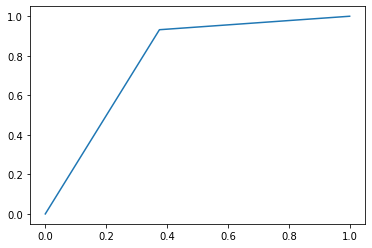

In [65]:
## Confusion Matrix 출력
y_test_stat_pred = pipe_stat.predict(X_test_stat)
print(classification_report(y_test, y_test_stat_pred))

## ROC Curve 활용
fpr, tpr, thresholds = roc_curve(y_test, y_test_stat_pred, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

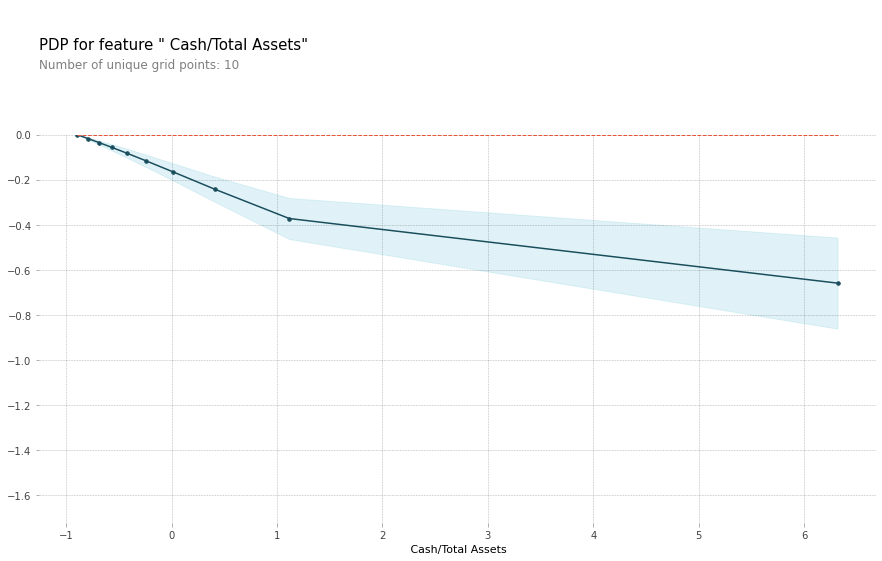

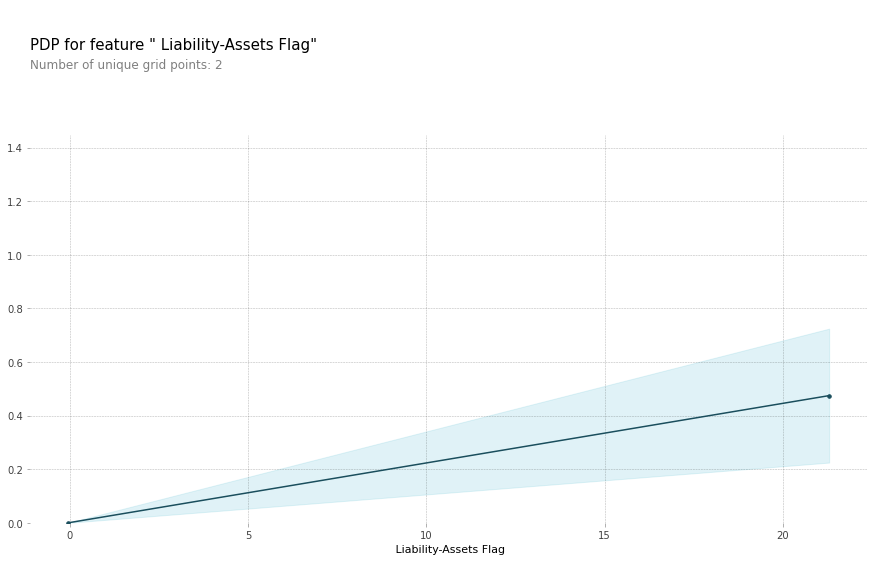

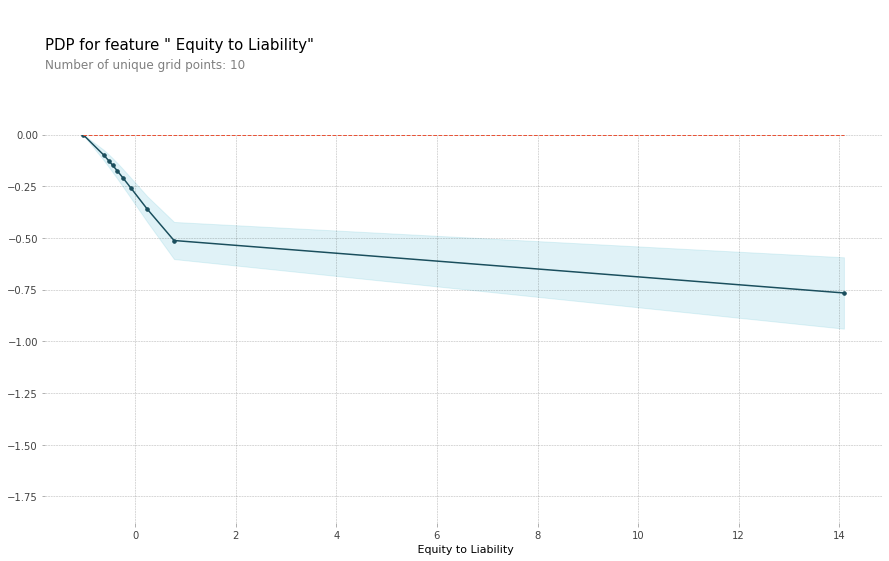

In [77]:
preprocessing = pipe_stat.named_steps['preprocessing']
X_preprocessed = preprocessing.fit_transform(X_test_stat)
X_preprocessed = pd.DataFrame(columns=stat_features, data=X_preprocessed)
lr = pipe_stat.named_steps['lr']

for feature in stat_features:
  pdp_dist = pdp.pdp_isolate(model=lr, dataset=X_preprocessed, model_features=stat_features, feature=feature)
  pdp.pdp_plot(pdp_dist, feature)

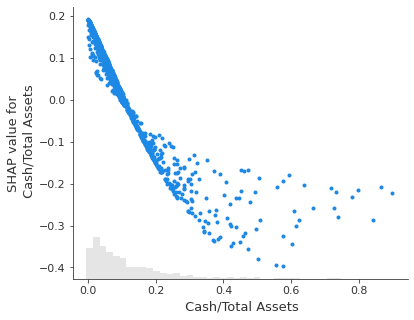

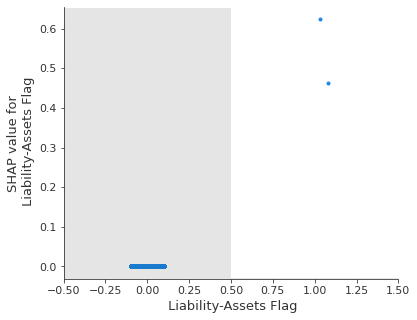

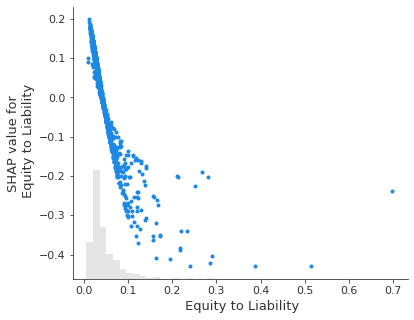

In [71]:
### SHAP
def pipe_stat_proba(x):
    return pipe_stat.predict_proba(x)[:,1]

background = shap.maskers.Independent(X_test_stat, max_samples=1000)
explainer = shap.Explainer(pipe_stat_proba, background)
shap_values = explainer(X_test_stat[:1000])

for feature in stat_features:
  shap.plots.scatter(shap_values[:, feature])